## Team 3 - City Services X Counciller Mejia  
Written by Derek Dumouchel  
- Initial assessessments on RRF and RRF Extension.
- Decision to analyze Boston 311 data for extension due to limited RRF/Housing Assistance Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# redacted-Results-April21-Sept21.csv
# redacted-Results-Oct20-Mar21.csv
zip_codes = pd.read_csv("MA_Zip_Codes.csv")
df1 = pd.read_csv("redacted-Results-Oct20-Mar21.csv")
df2 = pd.read_csv("redacted-Results-April21-Sept21.csv")

In [3]:
df1.head()

,id,notes,original_zip,manual_ zip,match_kind,state_code,county_code,tract_code,block_code,RRF Award Amount,...,Rent owing,RRF Award Type,Mthly Self Employment,Mthly Unemployment,Mthly Interest or Dividend,Mthly Pension or Retirement,Mthly TANF/Public Assistance,Mthly Alimony income,Mthly Armed Forces income,Mthly Other income
0,7,NaN,2119,NaN,Exact,25,25,81400.0,3003.0,6000,...,9444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,NaN,2124,NaN,Exact,25,25,100300.0,3005.0,5700,...,1900.0,Arrears & Future payments,NaN,2140.0,NaN,NaN,NaN,NaN,NaN,NaN
2,56,NaN,2119,NaN,Exact,25,25,80100.0,1051.0,3750,...,4375.0,Arrears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,63,NaN,2128,NaN,Exact,25,25,51200.0,3000.0,4000,...,4000.0,Arrears & Future payments,NaN,NaN,NaN,NaN,NaN,530.0,NaN,NaN
4,75,NaN,2128,NaN,Exact,25,25,50101.0,3001.0,6000,...,7900.0,Arrears,800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
print(df1.shape)
df1.isnull().sum()

(755, 21)


id                                0
notes                           753
original_zip                      8
manual_ zip                     747
match_kind                       32
state_code                        0
county_code                       0
tract_code                        2
block_code                        2
RRF Award Amount                 38
No of months of assistance      222
Rent owing                        1
RRF Award Type                  224
Mthly Self Employment           688
Mthly Unemployment              439
Mthly Interest or Dividend      745
Mthly Pension or Retirement     734
Mthly TANF/Public Assistance    729
Mthly Alimony income            723
Mthly Armed Forces income       744
Mthly Other income              692
dtype: int64

### Drop rows where:  
- No zip code
- No RRF Award Amount

Not useful without

In [5]:
print(zip_codes.head())
zip_codes = zip_codes.drop('county', axis=1)
zip_dict = dict(zip(zip_codes.zip_code, zip_codes.city))
# zip_dict = dict(zip(zip_codes.city, zip_codes.zip_code))

   zip_code         city     county
0      1001       Agawam    Hampden
1      1002      Amherst  Hampshire
2      1003      Amherst  Hampshire
3      1005        Barre  Worcester
4      1007  Belchertown  Hampshire


In [6]:
zip_dict

{1001: 'Agawam',
 1002: 'Amherst',
 1003: 'Amherst',
 1005: 'Barre',
 1007: 'Belchertown',
 1008: 'Blandford',
 1010: 'Brimfield',
 1011: 'Chester',
 1012: 'Chesterfield',
 1013: 'Chicopee',
 1020: 'Chicopee',
 1022: 'Chicopee',
 1026: 'Cummington',
 1027: 'Easthampton',
 1028: 'East Longmeadow',
 1030: 'Feeding Hills',
 1031: 'Gilbertville',
 1032: 'Goshen',
 1033: 'Granby',
 1034: 'Granville',
 1035: 'Hadley',
 1036: 'Hampden',
 1038: 'Hatfield',
 1039: 'Haydenville',
 1040: 'Holyoke',
 1050: 'Huntington',
 1053: 'Leeds',
 1054: 'Leverett',
 1056: 'Ludlow',
 1057: 'Monson',
 1060: 'Northampton',
 1062: 'Florence',
 1063: 'Northampton',
 1068: 'Oakham',
 1069: 'Palmer',
 1070: 'Plainfield',
 1071: 'Russell',
 1072: 'Shutesbury',
 1073: 'Southampton',
 1075: 'South Hadley',
 1077: 'Southwick',
 1080: 'Three Rivers',
 1081: 'Wales',
 1082: 'Ware',
 1085: 'Westfield',
 1089: 'West Springfield',
 1095: 'Wilbraham',
 1096: 'Williamsburg',
 1098: 'Worthington',
 1103: 'Springfield',
 1104: 

In [7]:
df1 = df1[df1['original_zip'].notna()]
# df1.isnull().sum()
df1 = df1[df1.original_zip.apply(lambda x: x.isnumeric())]
# df1['original_zip'].value_counts()


df1['city'] = df1['original_zip']
df1['city'] = df1['city'].astype(int)
df1['city'] = df1['city'].map(zip_dict)
# df1['city'] = df1['city'].replace(zip_dict)

In [8]:
df1['city'].value_counts()
# df1.head()

East Boston          181
Dorchester           139
Boston                83
Dorchester Center     82
Roxbury               48
Hyde Park             37
Mattapan              35
Brighton              31
Roslindale            22
Jamaica Plain         21
Allston               21
West Roxbury          15
South Boston          14
Charlestown           13
Roxbury Crossing       2
Chestnut Hill          1
Name: city, dtype: int64

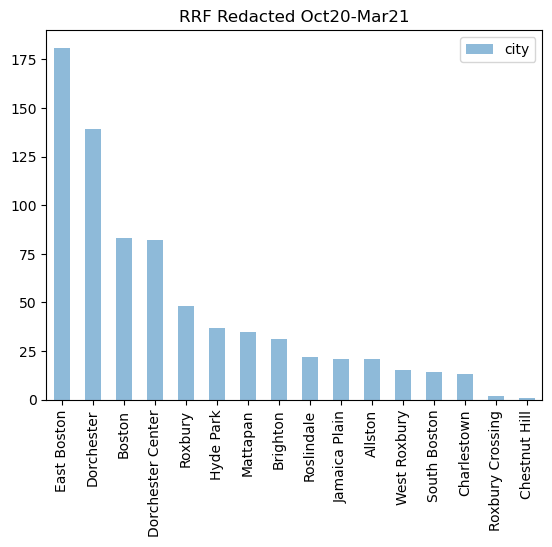

In [9]:
df1['city'].value_counts().plot(kind='bar', legend=True, alpha=0.5)
plt.title("RRF Redacted Oct20-Mar21")
plt.show()

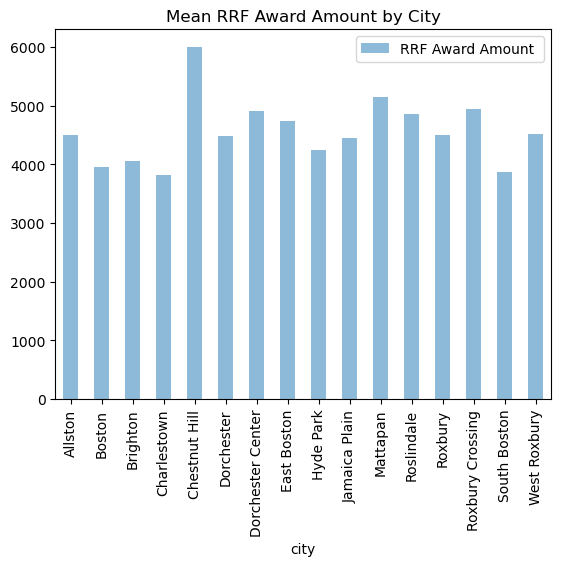

In [10]:
# df1['RRF Award Amount '].value_counts()
# df1.isnull().sum()
df1['RRF Award Amount '] = df1['RRF Award Amount '].astype(float)
df1 = df1[df1['RRF Award Amount '].notna()]
df1[['city', 'RRF Award Amount ']].groupby('city').mean().plot(kind='bar', legend=True, alpha=0.5)
plt.title("Mean RRF Award Amount by City")
plt.show()

Stopped here when Zihao uploaded Rental Data assessments for deliverable 3

## Extension Project

From Notes Tab:

RRF Data (Rental Relief Funds?): Please note the following regarding this record:
Data is submitted by non-profit partners and errors are possible
There is less data for applicants who were rejected before additional documentation was required for the completion of an application
In instances where applicants are rejected because tehy are Boston Housing Authority (BHA) tenants, the City funded BHA directly to serve these tenants
Applicants rejected because they were in subsidized housing would have been served by the Commonwealth of Massachusetts through a program where the state funded rent arrears in bulk for some large affordable housing owners
Street numbers are removed in order to address applicant confidentiality.


In [11]:
RRF = pd.read_csv("17F_Request-RRF_funds_1_ (1).csv", encoding='latin1')

In [12]:
RRF.isnull().sum()

Applicant Street                          7111
Applicant Zip Code                        4902
Type of Award                             8341
Race and Ethnicity                        6870
Primary Language Spoken                   5126
Gender Identity                           2504
Do you have a mobile housing voucher?    10262
Receive SNAP/EBT Benefits?                9697
How many in household?                     826
Total Monthly Income all sources             0
Are you currently employed?              12287
Total Amount Awarded                         0
Date Payment Issued                      19324
Disposition of case                        442
If ineligible, why?                      14390
Unnamed: 15                              20399
Unnamed: 16                              20399
Unnamed: 17                              20399
Unnamed: 18                              20399
Unnamed: 19                              20399
Unnamed: 20                              20399
Unnamed: 21  

In [13]:
RRF = RRF.drop(RRF.iloc[:, 15:229],axis = 1)
print("17F_Request-RRF_funds shape:", RRF.shape)
print("Percentage of Column Missing Values")
RRF.isnull().sum()*100/len(RRF)

17F_Request-RRF_funds shape: (20399, 15)
Percentage of Column Missing Values


Applicant Street                         34.859552
Applicant Zip Code                       24.030590
Type of Award                            40.889259
Race and Ethnicity                       33.678121
Primary Language Spoken                  25.128683
Gender Identity                          12.275112
Do you have a mobile housing voucher?    50.306388
Receive SNAP/EBT Benefits?               47.536644
How many in household?                    4.049218
Total Monthly Income all sources          0.000000
Are you currently employed?              60.233345
Total Amount Awarded                      0.000000
Date Payment Issued                      94.730134
Disposition of case                       2.166773
If ineligible, why?                      70.542674
dtype: float64

In [14]:
# ~70.5% of applicants ARE NOT ELLIGIBLE for RRF... This leaves a small amount that are 
RRF['If ineligible, why?'] = RRF['If ineligible, why?'].fillna("ELIGIBLE")
RRF = RRF[RRF['If ineligible, why?'] == 'ELIGIBLE']

RRF['If ineligible, why?'].value_counts()

ELIGIBLE    14390
Name: If ineligible, why?, dtype: int64

In [15]:
# Of Elligible Applicants
print('Types of Awards for Elligible Applicants:')
RRF['Type of Award'].value_counts()

Types of Awards for Elligible Applicants:


Rental Arrears                                                    8879
Future Stipend; Rental Arrears                                    1386
Future Stipend; Rental Arrears; Utility Payments                   410
Rental Arrears; Utility Payments                                   309
Future Stipend                                                     301
Utility Payments                                                   201
Moving Costs                                                        73
Future Stipend; Moving Costs                                        73
Future Stipend; Utility Payments                                    60
Future Stipend; Moving Costs; Rental Arrears                        23
Future Stipend; Moving Costs; Utility Payments                      12
Moving Costs; Utility Payments                                      12
Moving Costs; Rental Arrears                                        12
Moving Costs; Rental Arrears; Utility Payments                       4
Future

In [16]:
RRF = RRF[RRF['Applicant Zip Code'].notna()]
RRF['City'] = RRF['Applicant Zip Code']
RRF['City'] = RRF['City'].astype(int)
RRF['City'] = RRF['City'].map(zip_dict)
RRF['City'].value_counts()

Dorchester           1973
East Boston          1793
Boston               1088
Dorchester Center    1080
Roxbury               693
Hyde Park             556
Mattapan              531
Brighton              442
Jamaica Plain         348
Roslindale            316
Allston               296
West Roxbury          154
South Boston          154
Roxbury Crossing      141
Charlestown            91
Chestnut Hill           3
Athol                   1
Name: City, dtype: int64

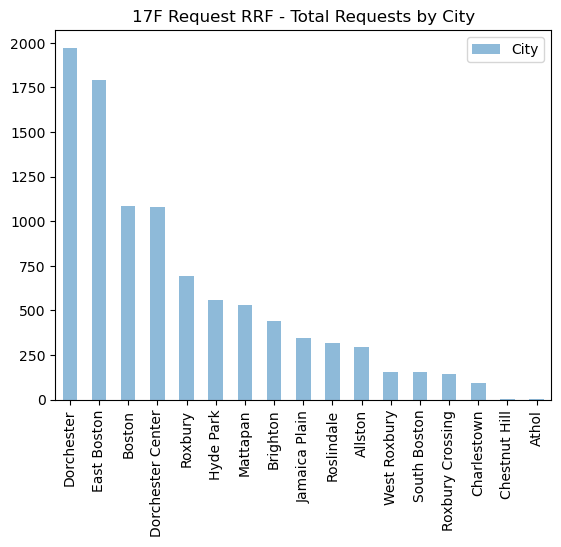

In [17]:
RRF['City'].value_counts().plot(kind='bar', legend=True, alpha=0.5)
plt.title("17F Request RRF - Total Requests by City")
plt.show()

The descision was made to assess the Boston 311 data as the extension project due to the limited RRF data and housing assistance data

## Boston 311

In [18]:
import os
os.getcwd()

BOS311_2022 = pd.read_csv("./BOS311/311_service_requests_2022.csv", encoding='latin1')
BOS311_2021 = pd.read_csv("./BOS311/311_service_requests_2021.csv", encoding='latin1')
BOS311_2020 = pd.read_csv("./BOS311/311_service_requests_2020.csv", encoding='latin1')
BOS311_2019 = pd.read_csv("./BOS311/311_service_requests_2019.csv", encoding='latin1')
BOS311_2018 = pd.read_csv("./BOS311/311_service_requests_2018.csv", encoding='latin1')
BOS311_2017 = pd.read_csv("./BOS311/311_service_requests_2017.csv", encoding='latin1')
BOS311_2016 = pd.read_csv("./BOS311/311_service_requests_2016.csv", encoding='latin1')

C:\Users\dumou\AppData\Local\Temp\ipykernel_4760\1181792652.py:5: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  BOS311_2021 = pd.read_csv("./BOS311/311_service_requests_2021.csv", encoding='latin1')


In [19]:
print("2022 Shape: ", BOS311_2022.shape)
print("2021 Shape: ", BOS311_2021.shape)
print("2020 Shape: ", BOS311_2020.shape)
print("2019 Shape: ", BOS311_2019.shape)
print("2018 Shape: ", BOS311_2018.shape)
print("2017 Shape: ", BOS311_2017.shape)
print("2016 Shape: ", BOS311_2016.shape)

2022 Shape:  (261003, 29)
2021 Shape:  (273951, 29)
2020 Shape:  (251374, 29)
2019 Shape:  (259496, 29)
2018 Shape:  (263105, 29)
2017 Shape:  (251495, 29)
2016 Shape:  (216626, 29)


In [20]:
for col in BOS311_2021.columns:
    print(col)

case_enquiry_id
open_dt
target_dt
closed_dt
ontime
case_status
closure_reason
case_title
subject
reason
type
queue
department
submittedphoto
closedphoto
location
fire_district
pwd_district
city_council_district
police_district
neighborhood
neighborhood_services_district
ward
precinct
location_street_name
location_zipcode
latitude
longitude
source


In [21]:
# Columns to assess/analyze
columns = ['case_enquiry_id', 
           'open_dt', 
           'target_dt', 
           'closed_dt',
           'hours_to_close',
           'year',
           'ontime', 
           'case_status',
           'subject', 
           'reason', 
           'type',
           'neighborhood']

def clean(df):
    df = df[df['closed_dt'].notna()]
    df = df[df['open_dt'].notna()]

    #Make Format datetime
    df['closed_dt'] = pd.to_datetime(df.closed_dt)
    df['open_dt'] = pd.to_datetime(df.open_dt)
    df['hours_to_close'] = (df.closed_dt - df.open_dt).astype('timedelta64[h]')
    df['year'] = pd.DatetimeIndex(df['open_dt']).year
    
    df = df[columns]
    df['neighborhood'].replace(' ', np.nan, inplace=True)
    df = df[df['neighborhood'].notna()]
    return df

BOS311_2022 = clean(BOS311_2022)
BOS311_2021 = clean(BOS311_2021)
BOS311_2020 = clean(BOS311_2020)
BOS311_2019 = clean(BOS311_2019)
BOS311_2018 = clean(BOS311_2018)
BOS311_2017 = clean(BOS311_2017)

In [22]:
#Combine all data 2017-2022
All311 = [BOS311_2022, BOS311_2021, BOS311_2020, BOS311_2019, BOS311_2018, BOS311_2017]
BOS311 = pd.concat(All311, keys=[2022,2021,2020,2019,2018,2017])
BOS311['dummy'] = 1

In [23]:
# case classification hierarchy (SUBJECT --> REASON --> TYPE)

BOS311['subject'].value_counts()
# BOS311['reason'].value_counts()
# BOS311['type'].value_counts()

Public Works Department              763496
Transportation - Traffic Division    362354
Inspectional Services                 86507
Parks & Recreation Department         72500
Mayor's 24 Hour Hotline               58232
Property Management                   17195
Animal Control                        10386
Boston Water & Sewer Commission        3288
Boston Police Department                249
Neighborhood Services                    83
Consumer Affairs & Licensing              5
Disability Department                     1
Name: subject, dtype: int64

In [24]:
# def time_to_close(df):
#     df = df[df['closed_dt'].notna()]
#     df = df[df['open_dt'].notna()]

#     #Make Format datetime
#     df['closed_dt'] = pd.to_datetime(df.closed_dt)
#     df['open_dt'] = pd.to_datetime(df.open_dt)
#     df['hours_to_close'] = (df.closed_dt - df.open_dt).astype('timedelta64[h]')
#     df['year'] = pd.DatetimeIndex(df['open_dt']).year
#     return df
    
# BOS311 = time_to_close(BOS311)
# BOS311['dummy'] = 1

In [25]:
BOS311.head()

case_enquiry_id             open_dt            target_dt  \
2022 5      101004113302 2022-01-01 00:36:24  2022-01-04 08:30:00   
     6      101004113310 2022-01-01 01:13:52  2022-01-04 08:30:00   
     7      101004113311 2022-01-01 01:14:39  2022-02-15 01:14:45   
     12     101004113420 2022-01-01 10:11:00  2022-01-04 08:30:00   
     13     101004113435 2022-01-01 10:41:00  2022-01-04 08:30:00   

                  closed_dt  hours_to_close  year   ontime case_status  \
2022 5  2022-01-03 00:13:17            47.0  2022   ONTIME      Closed   
     6  2022-01-03 00:13:02            46.0  2022   ONTIME      Closed   
     7  2022-04-02 13:01:14          2195.0  2022  OVERDUE      Closed   
     12 2022-01-01 12:02:23             1.0  2022   ONTIME      Closed   
     13 2022-01-03 06:28:24            43.0  2022   ONTIME      Closed   

                                   subject                            reason  \
2022 5   Transportation - Traffic Division  Enforcement & Abandoned Vehicles   
     6   Transportation - Traffic Division  Enforcement & Abandoned Vehicles   
     7             Public Works Department                     Street Lights   
     12            Public Works Department                   Street Cleaning   
     13            Public Works Department                        Sanitation   

                                                type  \
2022 5                           Parking Enforcement   
     6                           Parking Enforcement   
     7                      General Lighting Request   
     12                          Pick up Dead Animal   
     13  Missed Trash/Recycling/Yard Waste/Bulk Item   

                                   neighborhood  dummy  
2022 5   South Boston / South Boston Waterfront      1  
     6                               Dorchester      1  
     7                            Jamaica Plain      1  
     12                             Charlestown      1  
     13                               South End      1

In [26]:
BOS311['subject'].value_counts()

Public Works Department              763496
Transportation - Traffic Division    362354
Inspectional Services                 86507
Parks & Recreation Department         72500
Mayor's 24 Hour Hotline               58232
Property Management                   17195
Animal Control                        10386
Boston Water & Sewer Commission        3288
Boston Police Department                249
Neighborhood Services                    83
Consumer Affairs & Licensing              5
Disability Department                     1
Name: subject, dtype: int64

In [27]:
public_works = BOS311.loc[BOS311['subject'] == "Public Works Department"]
# public_works['neighborhood'].value_counts()

In [28]:
## These Pivot Table Plots are hard to visualize

# pv = pd.pivot_table(BOS311, 
#                     index=BOS311.year,
#                     columns=BOS311.subject, 
#                     values='dummy', aggfunc=np.sum)
# pv.plot()

In [29]:
## These Pivot Table Plots are hard to visualize

# public_works = public_works[public_works['neighborhood'].notna()]
# pv_pw = pd.pivot_table(public_works, 
#                     index=public_works.year,
#                     columns=public_works.neighborhood, 
#                     values='dummy', aggfunc=np.sum)
# pv_pw.plot()

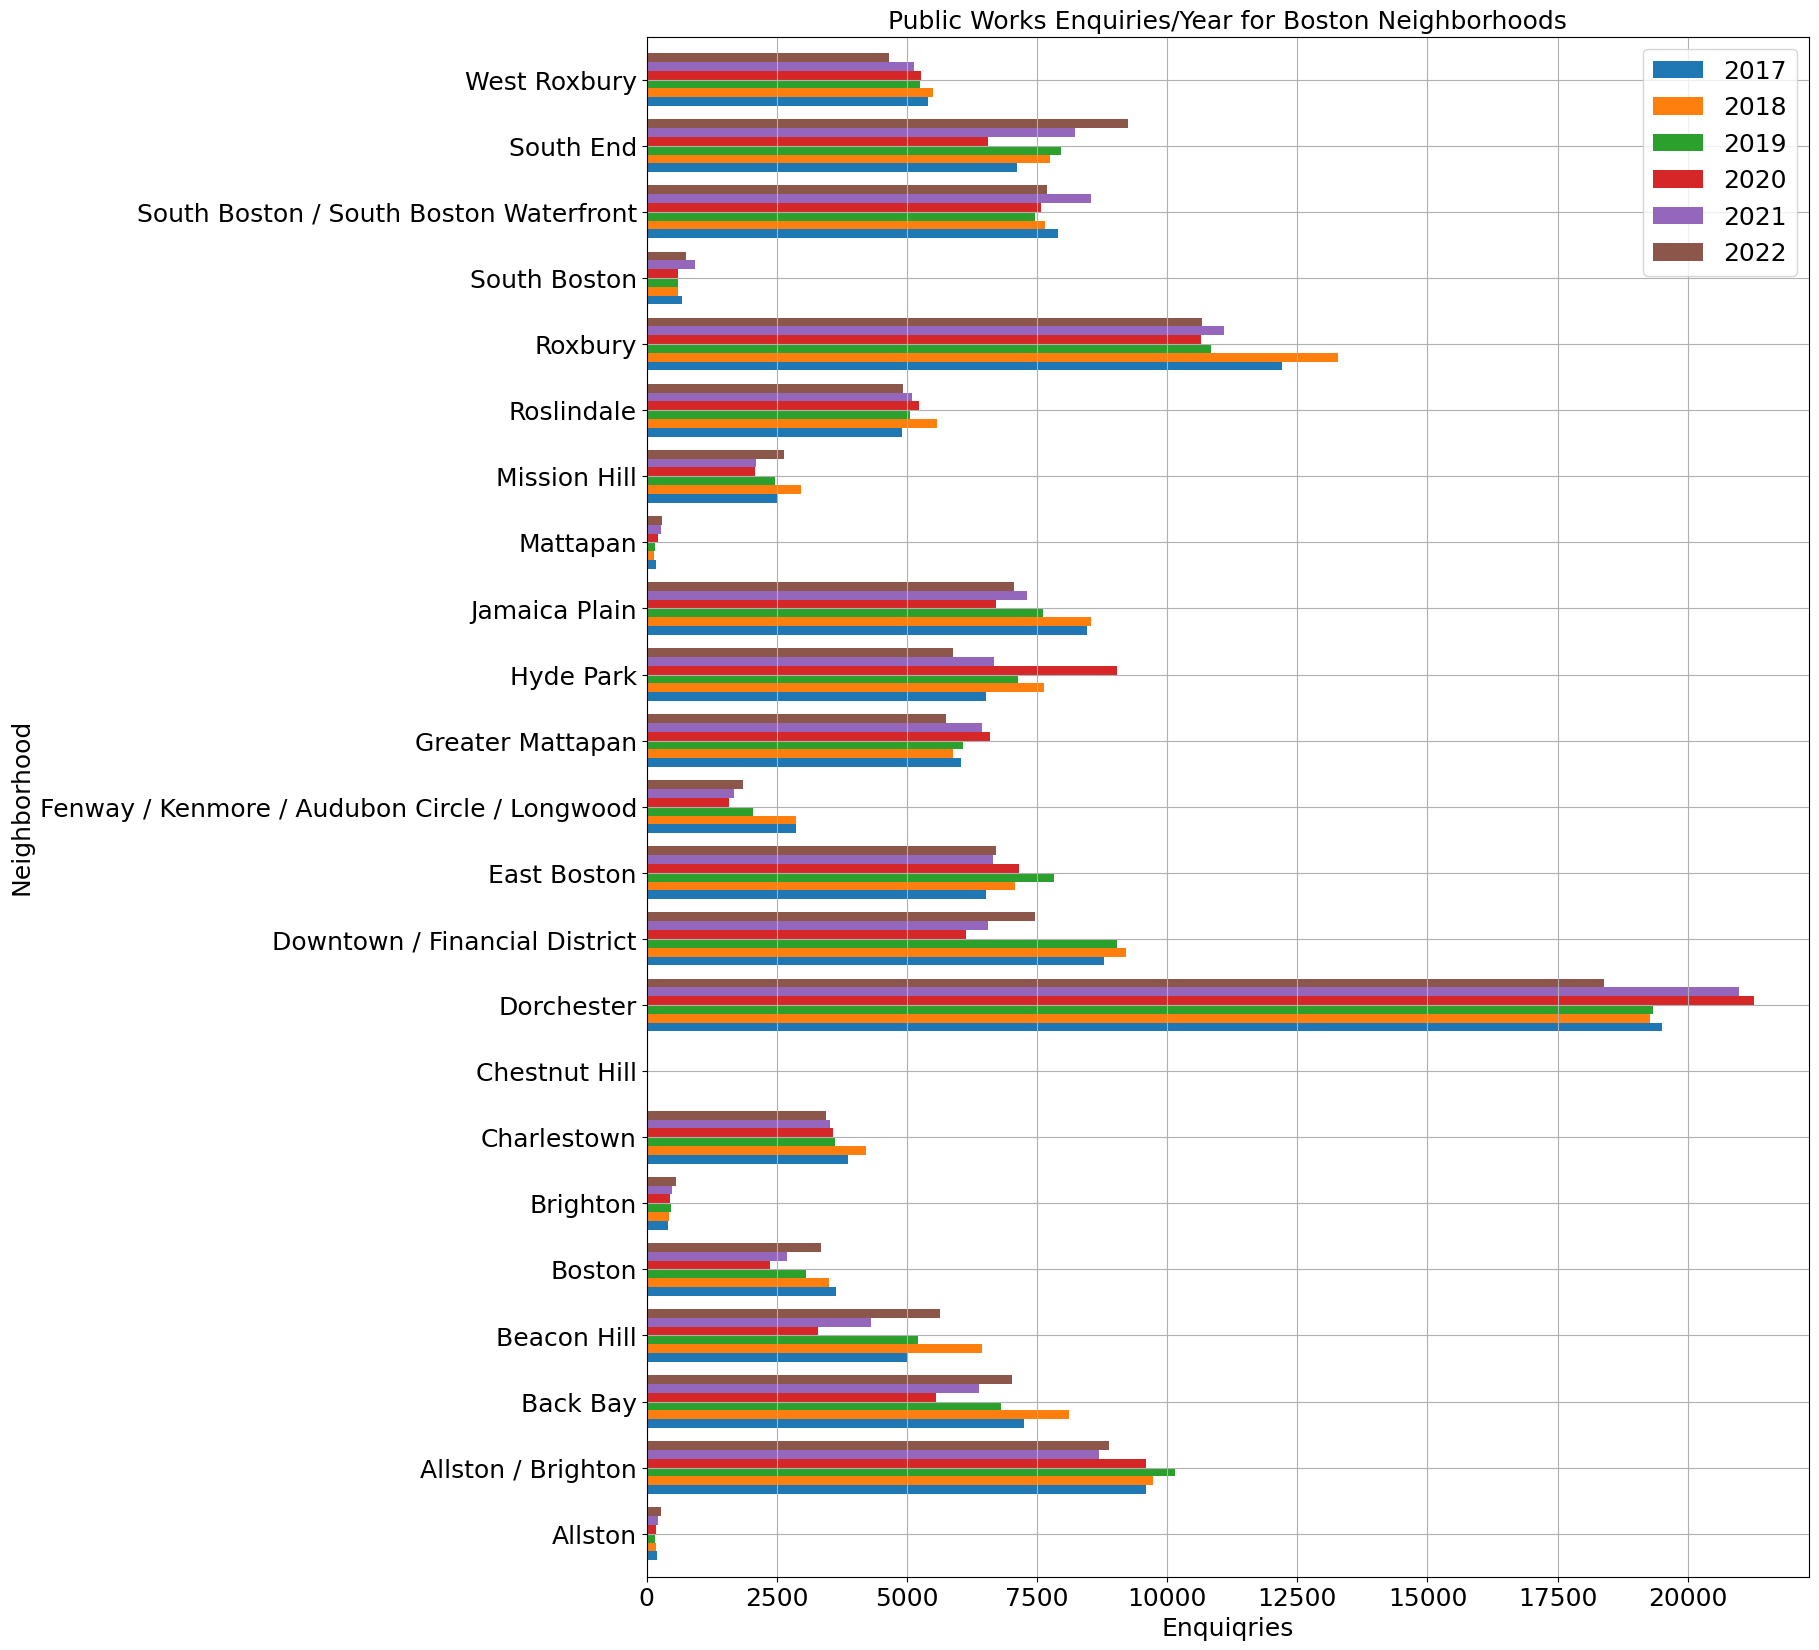

In [30]:
crosstb = pd.crosstab(public_works['neighborhood'],public_works['year'])

a = crosstb.plot.barh(stacked=False, 
                      width = 0.80,
                      figsize=(15,20)) #width, height
plt.title('Public Works Enquiries/Year for Boston Neighborhoods', size=18)
plt.legend(prop={'size': 18})
plt.ylabel('Neighborhood', size = 18)
plt.xlabel('Enquiqries', size = 18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid(True)
plt.show()

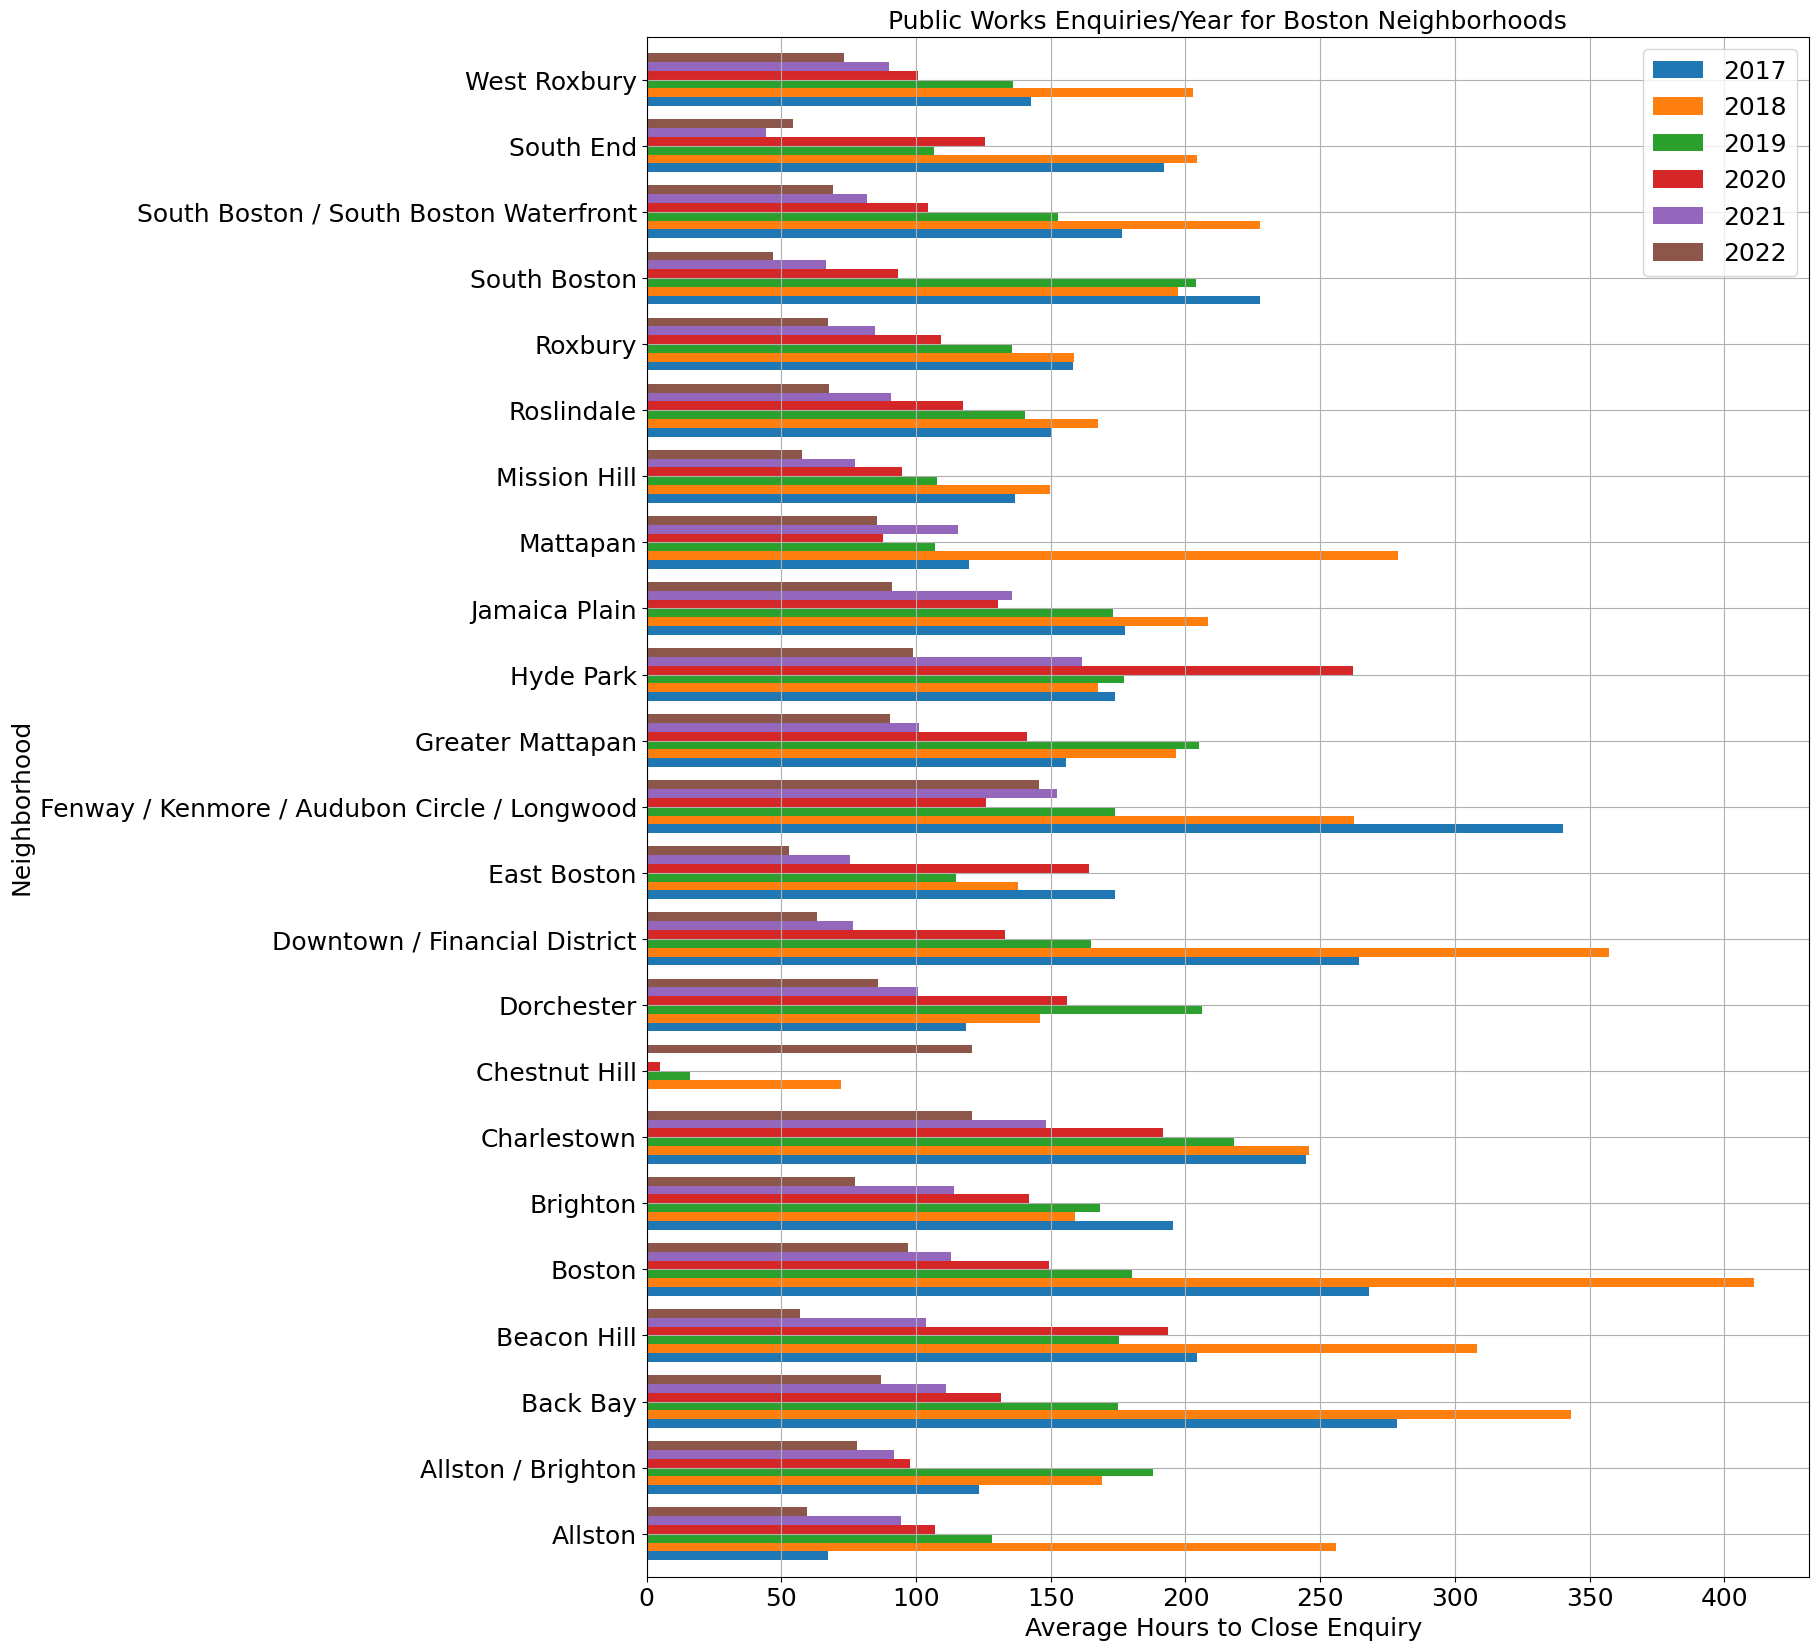

In [31]:
# public_works = BOS311.loc[BOS311['subject'] == "Public Works Department"]
# public_works = public_works[public_works['neighborhood'].notna()]
pv_pw = pd.pivot_table(public_works, 
                    index = public_works.neighborhood,
                    columns=public_works.year, 
                    values='hours_to_close', aggfunc=np.mean)

# hours_plt = pv_pw.plot(kind = 'barh', stacked=False, width = 0.80, figsize=(15,20))
hours_plt = pv_pw.plot.barh(stacked=False, width = 0.80, figsize=(15,20))

# plt.width = 18
# plt.figsize=(20,100)
plt.title('Public Works Enquiries/Year for Boston Neighborhoods', size=18)
plt.legend(prop={'size': 18})
plt.ylabel('Neighborhood', size = 18)
plt.xlabel('Average Hours to Close Enquiry ', size = 18)
plt.xticks(size = 18)
plt.yticks(size = 18)
plt.grid(True)
plt.show()

In [32]:
BOS311['subject'].value_counts()

Public Works Department              763496
Transportation - Traffic Division    362354
Inspectional Services                 86507
Parks & Recreation Department         72500
Mayor's 24 Hour Hotline               58232
Property Management                   17195
Animal Control                        10386
Boston Water & Sewer Commission        3288
Boston Police Department                249
Neighborhood Services                    83
Consumer Affairs & Licensing              5
Disability Department                     1
Name: subject, dtype: int64

In [33]:
pd.set_option("display.max_rows", None)
counts_2022 = BOS311_2022.groupby('neighborhood')['subject'].value_counts(normalize=True).to_frame()

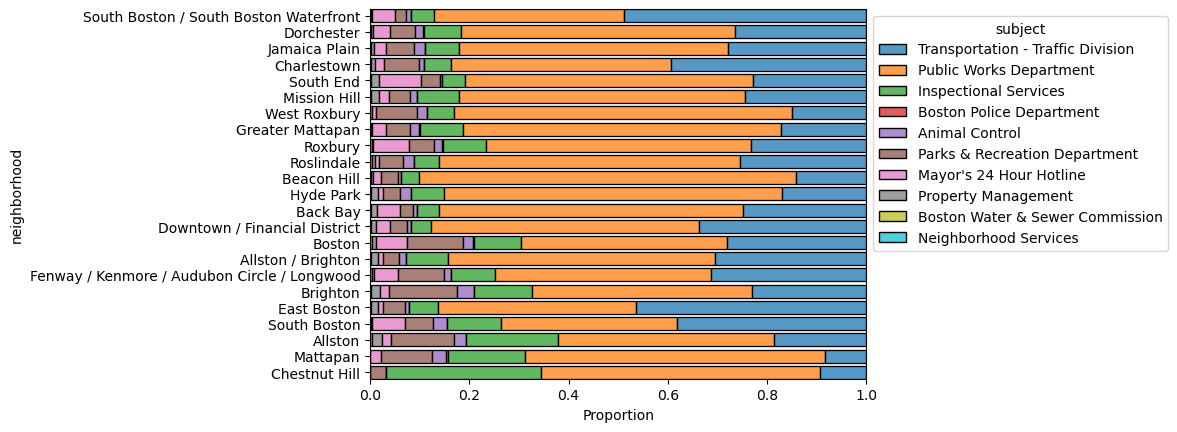

In [34]:
#2022
import seaborn as sns
#2022 has no consumer affairs and licensing
sub_22 = sns.histplot(
    data=BOS311_2022,
    y="neighborhood", hue="subject",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)
# sns.color_palette("dark")
# sns.set_palette("Dark2")
sns.move_legend(sub_22, "upper left", bbox_to_anchor=(1, 1))

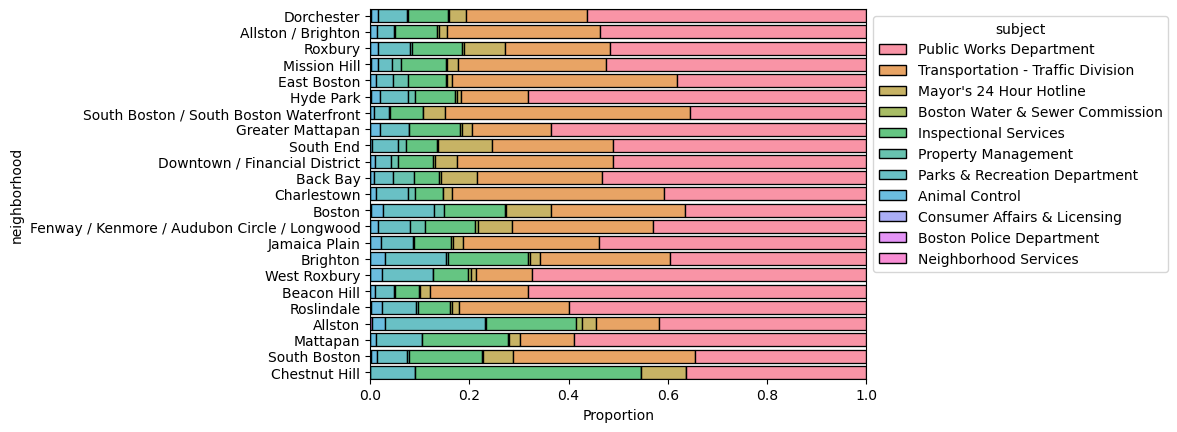

In [35]:
#2021
sub_21 = sns.histplot(
    data=BOS311_2021,
    y="neighborhood", hue="subject",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)
sns.move_legend(sub_21, "upper left", bbox_to_anchor=(1, 1))

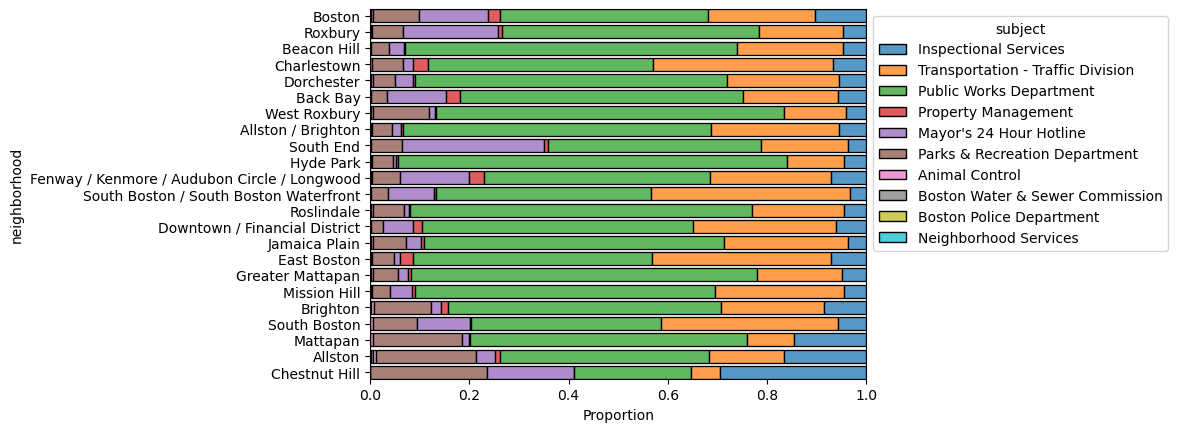

In [36]:
#2020
import seaborn as sns

sub_20 = sns.histplot(
    data=BOS311_2020,
    y="neighborhood", hue="subject",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)
sns.move_legend(sub_20, "upper left", bbox_to_anchor=(1, 1))

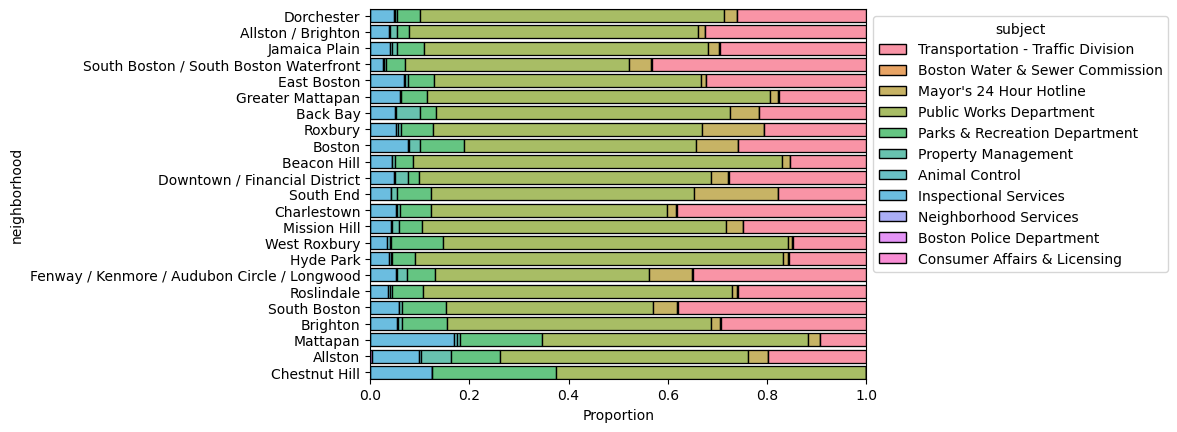

In [37]:
#2019
sub_19 = sns.histplot(
    data=BOS311_2019,
    y="neighborhood", hue="subject",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)
sns.move_legend(sub_19, "upper left", bbox_to_anchor=(1, 1))

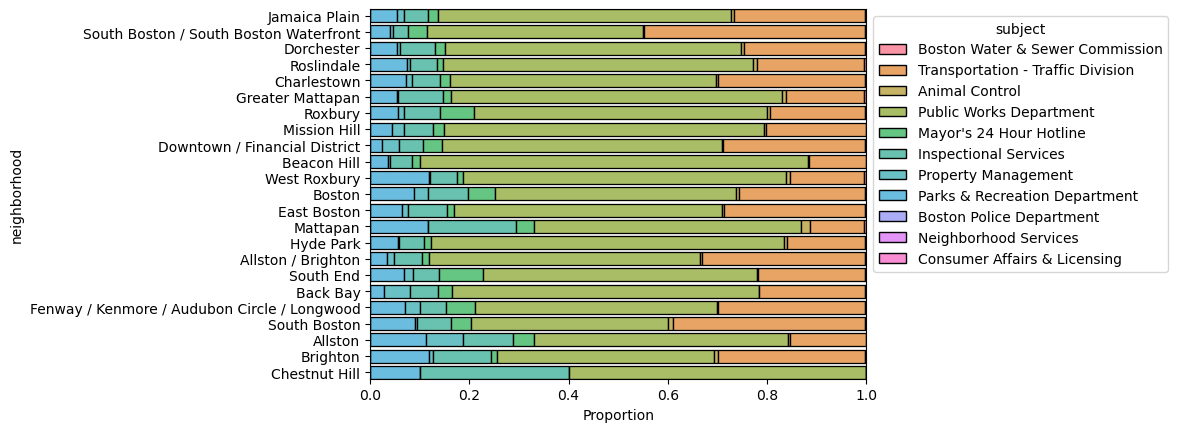

In [38]:
#2018
sub_18 = sns.histplot(
    data=BOS311_2018,
    y="neighborhood", hue="subject",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)
sns.move_legend(sub_18, "upper left", bbox_to_anchor=(1, 1))

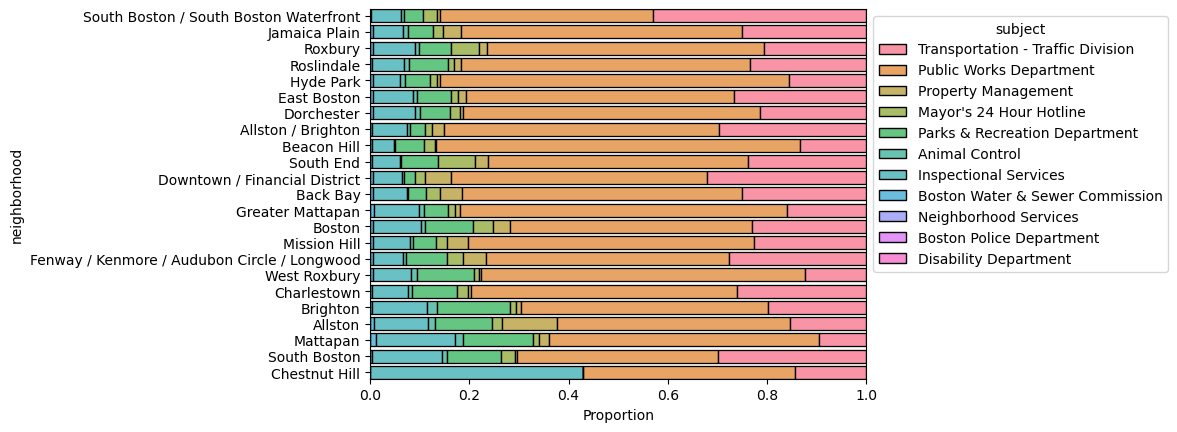

In [39]:
#2017
sub_17 = sns.histplot(
    data=BOS311_2017,
    y="neighborhood", hue="subject",
    multiple="fill", stat="proportion",
    discrete=True, shrink=.8
)
sns.move_legend(sub_17, "upper left", bbox_to_anchor=(1, 1))

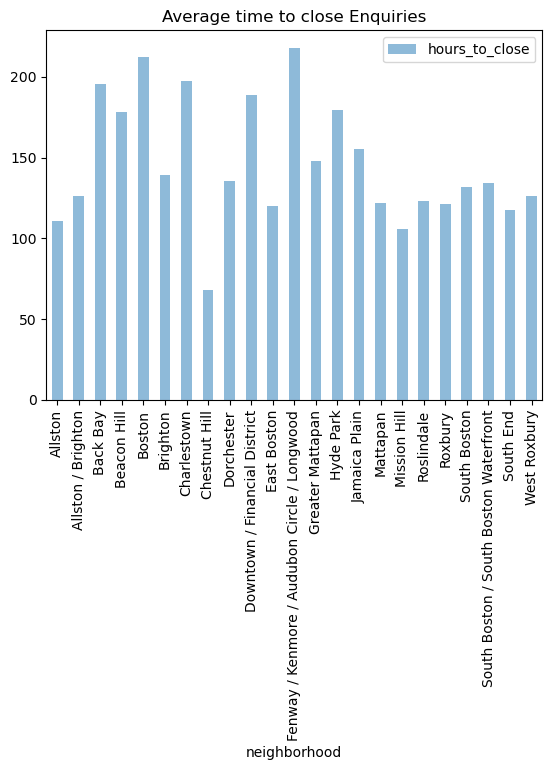

In [40]:
# sns.barplot(data=public_works, x='neighborhood', y='hours_to_close', hue='year', aspect=1.61)
# plt.show()

public_works[['neighborhood', 'hours_to_close']].groupby('neighborhood').mean().plot(kind='bar', legend=True, alpha=0.5)
plt.title("Average time to close Enquiries")
plt.show()